In [ ]:
!pip install auto-sklearn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.metrics
import autosklearn.regression
import pickle
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving model.pkl to model.pkl


In [ ]:
with open("model.pkl", "rb") as f:
    model = pickle.load(f)

# Графики для района

In [ ]:
X = pd.DataFrame()
X['Район'] = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
X['Стадия строительной готовности на дату договора'] = [1, 1, 1, 1, 1, 1, 1, 1, 3, 3]
X['Срок ввода в эксплуатацию - Старт продаж'] = [822, 822, 608, 608, 822, 822, 1217, 1217, 669, 669]
X['Класс'] = [2,2,2,2,2,2,2,2, 2, 2]
X['Девелопер'] = [17,17, 7, 7, 17, 17, 9, 9, 7, 7]
X['Срок ввода в эксплуатацию - Договор'] = [378,378, 173, 173, 518, 518, 380, 380, 593, 593]
X['Квартал договора'] = [3,3,4,4, 3, 3, 2, 2, 3, 3]
X['Квартал регистрации'] = [3,3,4,4, 3, 3, 2, 2, 2, 2]
X['Тип сделки'] = [1,1,1,1,1,1,1,1, 0, 0]
X['Тип объекта'] = [1,1,1,1,1,1,1,1, 1, 1]
X['Секция'] = [1,1,5,5,5,5,1,1, 6, 6]
X['Этаж'] = [3,3,1,1, 15,15,5,5, 5, 5]
X['Количество комнат'] = [3,3,4,4,0,0,1,1, 1, 1]
X['Площадь согласно ПД'] = [72.5, 72.5, 165.7,165.7,19.7,19.7,36.7,36.7, 37.7, 37.7]
X['Метод определения цены'] = [4,4, 1, 1,4,4,4,4, 4, 4]
X['Включение скидок/акций в ценообразование'] = [0,0, 2,2,2,2,1,1, 2, 2]
X['Скидки по дате договора'] = [0,0,2,2,0,0,15,15, 5, 5]
X['Отделка по корпусу'] = [8, 8, 0, 0,8,8,6,6, 8, 8]
X['Тип продавца'] =[1,1, 1, 1,1,1,1,1, 1, 1]
X['Тип покупателя'] = [0, 0, 0,0,0,0,0,0, 0, 0]
X['Кол-во покупателей'] = [2,2, 1, 1,1,1,1,1, 1, 1]
X['Тип ипотеки'] = [0,0, 0,0,0,0,0,0, 0, 0]
X['Участие объекта в оптовой сделке'] = [1,1, 1, 1,1,1,1,1, 1, 1]
X['Срок в экспозиции до момента сделки, дней'] = [64,64, 0,0,0,0,0,0, 46, 46]
X['Рост цены за 1 кв.м за период экспонирования'] = [1.3, 1.3, 0,0,0,0,0,0, -4.5, -4.5]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 25 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Район                                            10 non-null     int64  
 1   Стадия строительной готовности на дату договора  10 non-null     int64  
 2   Срок ввода в эксплуатацию - Старт продаж         10 non-null     int64  
 3   Класс                                            10 non-null     int64  
 4   Девелопер                                        10 non-null     int64  
 5   Срок ввода в эксплуатацию - Договор              10 non-null     int64  
 6   Квартал договора                                 10 non-null     int64  
 7   Квартал регистрации                              10 non-null     int64  
 8   Тип сделки                                       10 non-null     int64  
 9   Тип объекта                        

In [ ]:
res = model.predict(X)
res

array([133496.515625 , 135528.640625 , 125283.6796875, 124008.5234375,
       248554.421875 , 250595.671875 , 120296.1875   ,  91618.4453125,
       147826.171875 , 145612.8125   ])

In [ ]:
change = list()
for i in range(0, len(res), 2):
  ch = (X['Площадь согласно ПД'][i+1]*res[i+1])/(X['Площадь согласно ПД'][i]*res[i])
  if ch >=1:
    change.append(ch-1)
  else:
    change.append(-(1-ch))
change

[0.0152223074174338,
 -0.01017815132170985,
 0.008212487167202909,
 -0.23839277689078886,
 -0.014972716582768553]

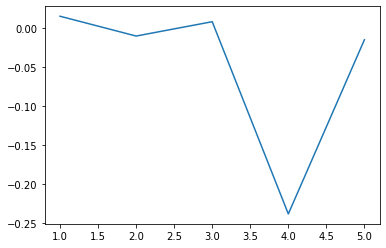

In [ ]:
plt.plot([1,2,3,4,5], change)
plt.show()

AttributeError: ignored

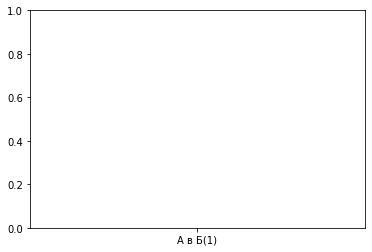

In [ ]:
plt.plot(["А в Б(1)", "А в Б(1)","А в Б(1)","А в Б(1)","А в Б(1)"], change, histtype='bar', rwidth=0.8)

# Графики для Срок ввода в эксплуатацию - Старт продаж


In [ ]:
pos = [58]
for i in range(1,10):
  pos.append(58+(219*i))
pos


[58, 277, 496, 715, 934, 1153, 1372, 1591, 1810, 2029]

In [ ]:
dt = pd.read_excel('ml.xlsx')
dt

,Unnamed: 0,Район,Стадия строительной готовности на дату договора,Срок ввода в эксплуатацию - Старт продаж,Класс,Девелопер,Срок ввода в эксплуатацию - Договор,Квартал договора,Квартал регистрации,Тип сделки,Тип объекта,Секция,Этаж,Количество комнат,Площадь согласно ПД,Цена за кв. метр,Метод определения цены,Включение скидок/акций в ценообразование,Скидки по дате договора,Отделка по корпусу,Тип продавца,Тип покупателя,Кол-во покупателей,Тип ипотеки,Участие объекта в оптовой сделке,"Срок в экспозиции до момента сделки, дней",Рост цены за 1 кв.м за период экспонирования
0,0,0,6,1156.0,2,0,546.0,1,1,1,1,4,5,0,27.43,95325.34,4,0,12,8,1,0,1,1,1,0,0.0
1,1,0,1,821.0,2,3,546.0,1,2,1,1,4,11,2,62.60,114000.00,4,0,2,0,1,0,1,1,1,211,7.5
2,2,0,1,821.0,2,3,546.0,1,2,1,1,13,22,0,24.10,143000.00,4,0,2,0,1,0,3,1,1,211,16.3
3,3,0,1,1155.0,2,0,271.0,1,4,0,1,4,6,0,28.22,102625.78,4,0,12,0,1,0,1,0,1,0,0.0
4,4,0,1,789.0,2,17,453.0,1,1,1,1,1,21,2,51.20,131700.00,4,0,2,8,1,0,1,1,1,275,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63317,64673,0,5,908.0,2,13,759.0,3,3,1,1,3,10,1,33.10,169500.00,4,0,0,8,1,0,2,0,1,145,6.3
63318,64674,0,5,908.0,2,13,758.0,3,3,1,1,4,4,1,37.20,161500.00,4,0,0,8,1,0,1,1,1,140,4.5
63319,64675,0,5,908.0,2,13,758.0,3,3,1,1,1,11,1,45.10,154738.80,4,0,0,8,1,0,1,1,1,92,0.6
63320,64676,0,5,908.0,2,13,758.0,3,3,1,1,3,8,2,52.60,154241.35,4,0,0,8,1,0,1,1,1,31,1.3


In [ ]:
df = dt
df = df.drop(['Unnamed: 0'], axis=1)
df = df.dropna()
df.isnull().sum().sum()

0

In [ ]:
a = (df.loc[df['Срок ввода в эксплуатацию - Старт продаж'] > 944])
a = (a.loc[a['Срок ввода в эксплуатацию - Старт продаж'] < 1153])
b = a.sample(frac=0.00255)
b

,Район,Стадия строительной готовности на дату договора,Срок ввода в эксплуатацию - Старт продаж,Класс,Девелопер,Срок ввода в эксплуатацию - Договор,Квартал договора,Квартал регистрации,Тип сделки,Тип объекта,Секция,Этаж,Количество комнат,Площадь согласно ПД,Цена за кв. метр,Метод определения цены,Включение скидок/акций в ценообразование,Скидки по дате договора,Отделка по корпусу,Тип продавца,Тип покупателя,Кол-во покупателей,Тип ипотеки,Участие объекта в оптовой сделке,"Срок в экспозиции до момента сделки, дней",Рост цены за 1 кв.м за период экспонирования
29695,0,0,1020.0,2,7,285.0,2,2,1,1,1,11,4,105.20,131218.0,4,0,7,8,1,0,1,1,1,0,0.0
20451,0,5,990.0,1,6,777.0,4,4,1,1,2,7,1,37.10,149179.0,0,0,0,0,1,0,1,0,1,0,0.0
44766,0,4,1036.0,2,3,43.0,4,3,0,1,8,10,3,82.30,112389.0,5,1,15,0,1,0,1,1,1,984,18.3
56127,0,1,996.0,2,15,43.0,2,1,0,1,4,7,1,36.25,115436.0,1,0,0,8,0,0,1,0,1,0,0.0
11985,0,5,1036.0,2,17,930.0,2,2,1,1,7,7,2,69.30,111700.0,4,0,2,8,1,0,2,1,1,0,0.0
37817,0,1,983.0,2,17,640.0,3,1,1,1,1,11,2,52.50,140400.0,4,2,0,8,1,0,2,0,1,0,0.0
179,0,5,1064.0,2,8,901.0,1,1,1,1,5,3,1,46.10,99254.1,4,0,0,0,1,0,1,1,1,0,0.0
13590,0,3,1036.0,2,17,907.0,3,3,1,1,1,2,1,39.40,141900.0,4,0,2,8,1,0,1,1,1,84,-3.3
35550,0,1,983.0,2,17,663.0,3,3,1,1,2,11,2,59.10,132400.0,4,2,0,8,1,0,1,0,1,21,0.2
44383,0,4,1036.0,2,3,46.0,4,3,0,1,12,9,2,57.10,127566.0,4,1,15,0,1,0,1,0,1,926,22.7


In [ ]:
plot_data = 0
for i in range(10):
  if type(plot_data) == int:
    plot_data = b[i:i+1].copy(deep=True)
  else:
    plot_data = plot_data.append(b[i:i+1], ignore_index=True)
  for j in pos:
    temp = b[i:i+1].copy(deep=True)
    temp.loc[(temp['Срок ввода в эксплуатацию - Старт продаж'] > 0), 'Срок ввода в эксплуатацию - Старт продаж'] = j
    plot_data = plot_data.append(temp, ignore_index=True)
plot_data
X = plot_data.drop(['Цена за кв. метр'], axis=1)
X

In [164]:
res = model.predict(X)
res

array([125180.4296875, 135701.859375 , 139028.296875 , 127282.5390625,
       119497.7265625, 118358.2890625, 123716.8359375, 123439.546875 ,
       124402.234375 , 124402.234375 , 124402.234375 , 151296.859375 ,
       179385.296875 , 182973.578125 , 155326.734375 , 147638.25     ,
       145447.90625  , 150787.921875 , 150599.046875 , 151591.15625  ,
       151591.15625  , 151591.15625  , 118512.7265625, 130118.1015625,
       131530.71875  , 128304.4765625, 124524.3203125, 118701.59375  ,
       114601.9453125, 111437.7421875, 112848.5234375, 112848.5234375,
       112848.5234375, 121967.1484375, 144609.3125   , 150331.28125  ,
       138831.75     , 128064.171875 , 127364.03125  , 120428.421875 ,
       133418.703125 , 136015.25     , 136015.25     , 136015.25     ,
       113348.4609375, 122319.53125  , 126378.4921875, 128983.6328125,
       116183.0625   , 111122.5078125, 100050.328125 ,  99533.875    ,
       100489.78125  , 100489.78125  , 100489.78125  , 145315.203125 ,
      

In [172]:
X['Площадь согласно ПД'][1]*res[1]

14275835.606250001

In [ ]:
change = list()
for i in range(0, len(res), 11):
  chg = list()
  for j in range(1, 11):
    ch = (X['Площадь согласно ПД'][i]*res[i])/(X['Площадь согласно ПД'][i+j]*res[i+j])
    if ch >=1:
      chg.append(round((1-ch),4))
    else:
      chg.append(round(1-ch, 4))
  change.append(chg)
change

No handles with labels found to put in legend.


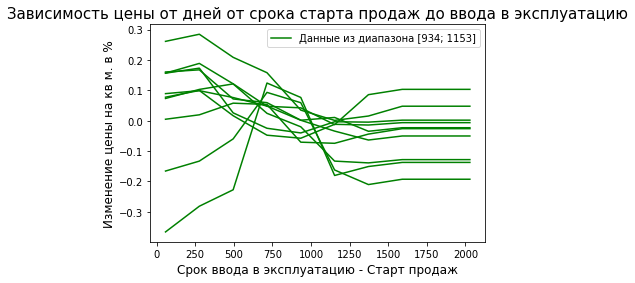

In [199]:
plt.xlabel('Срок ввода в эксплуатацию - Старт продаж', fontsize=12)
plt.ylabel('Изменение цены на кв м. в %', fontsize=12)
plt.plot(pos, change[0], '-g',  pos, change[1], '-g', pos, change[2], '-g', pos, change[3], '-g', pos, change[4], '-g', pos, change[5], '-g', pos, change[6], '-g', pos, change[7], '-g', pos, change[8], '-g', pos, change[9], '-g')
plt.legend()
plt.title('Зависимость цены от дней от срока старта продаж до ввода в эксплуатацию', fontsize=15)
plt.legend(['Данные из диапазона [934; 1153]'])